In [120]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [121]:
boston = load_boston()

In [122]:
X = boston.data
y = boston.target

In [123]:
import matplotlib.pyplot as plt

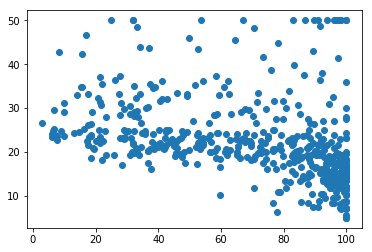

In [124]:
plt.scatter(X[:,6],y)

In [125]:
#normalize the data
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X - u )/std
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [126]:
def hypothesis(x,theta):
    y_ = 0.0
    m = x.shape[0]
    for i in range(m):
        y_ += theta[i] * x[i]
    return y_

In [127]:
def error(X,y,theta):
    m,n = X.shape
    e = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y_ - y[i])**2
    return e/m
def gradient(X,y,theta):
    
    m,n = X.shape
    grad = np.zeros((n,))
    #for all features
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i] )*X[i][j]
    return grad/m
def gradientDescent(X,Y,learning_rate = 0.1,max_epochs = 300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epochs):
        e = error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate * grad[j]
    return theta, error_list

In [128]:
theta , error_list = gradientDescent(X,y)

In [129]:
y_pred = []
for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_pred.append(pred)
#y_pred = hypothesis(X,)

In [130]:
def r2_score(y,y_pred,theta):
    num = np.sum((y-y_pred)**2)
    denom = np.sum((y - y.mean())**2)
    acc = 1-num/denom
    return acc

In [133]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

In [131]:
acc= r2_score(y,y_pred,theta)

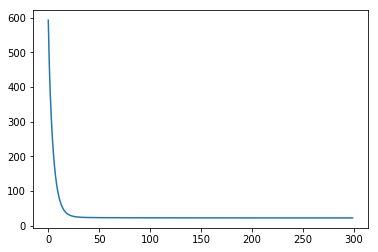

In [132]:
plt.plot(error_list)

In [134]:
#for better performance we will use vectorization
def hypothesis(X,theta):
    return np.dot(X,theta)
def error(X,y,theta):
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/X.shape[0]
def gradient(X,y,theta):
    m,n= X.shape
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    return grad/m
def gradientDescent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    error_list=[]
    theta = np.zeros((n,))
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate * grad
    return theta,error_list

In [135]:
start = time.time()
theta,error_list = gradientDescent(X,y)
end = time.time()
print(end-start)

0.017923593521118164


In [136]:
y_pred = hypothesis(X,theta)


In [137]:
def r2_score(y,y_pred):
    num = np.sum((y-y_pred)**2)
    denom = np.sum((y - y.mean())**2)
    acc = 1-num/denom
    return acc

In [138]:
acc = r2_score(y,y_pred)

In [139]:
acc

0.7404541323942743

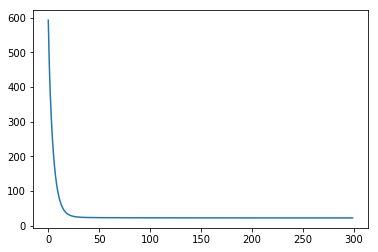

In [140]:
plt.plot(error_list)

In [93]:
import time